# Understanding the Geographical Impact on Restaurant Reviews: A Yelp Data Analysis

## **Team Members:**

Hugh Wang(hughwang@umich.edu)  
Brian Wang(bswang@umich.edu)

## **Overview**

This project analyzes the relationship between geographical features and restaurant review trends in the United States. We aim to explore how factors such as location type (e.g., downtown vs. suburban), proximity to landmarks, and neighborhood characteristics influence customer feedback and ratings.

## **Motivation**

We chose this topic because understanding how geography influences customer behavior is valuable for businesses and urban planners alike. Restaurants in different areas may have varied customer expectations, and insights into these differences can help businesses tailor their services more effectively. Here are the three real-world questions we generated for this project:

- **How do review ratings vary by restaurant category (e.g., fast food vs. fine dining) across different regions in the U.S.?**  
  By answering this question, we aim to learn whether customers in different regions prefer certain types of restaurants and how these preferences influence review ratings. This will help identify regional trends in customer satisfaction.

- **What times of the year do restaurants tend to receive the most reviews, and how does this trend affect review sentiment?**  
  This question will help us understand seasonal patterns in review activity and whether customer sentiment (positive or negative) shifts during specific times of the year, such as holidays or summer months.

- **Are restaurants with higher average ratings more likely to have detailed reviews compared to those with lower ratings?**  
  This analysis will explore whether detailed reviews are more often associated with positive experiences or if dissatisfied customers also tend to provide more in-depth feedback. Understanding this can offer insights into the correlation between review length and customer satisfaction.


## **Data Sources**

In this project, we will use two key components from the Yelp dataset:

### **Yelp Business Dataset**  
This dataset contains vital information about businesses, including their name, location (address, latitude, longitude), category (e.g., restaurant, bar), and various attributes (e.g., price range, amenities like parking or takeout options). This structured data provides a comprehensive overview of the business characteristics that are essential for analysis.

- **URL**: [Yelp Dataset](https://www.yelp.com/dataset)  

### **Yelp Review Dataset**  
This dataset contains customer feedback in the form of written reviews, star ratings (1 to 5 stars), and timestamps. It captures user experiences for each business, offering a dynamic perspective on customer satisfaction, preferences, and the factors that influence ratings over time.

- **URL**: [Yelp Dataset](https://www.yelp.com/dataset)
  
### **US Population Dataset**
This dataset contains population statistics of each US state. It captures the ranking, ratio to entire US population, and population count of each state.

- **URL**: [US Population Dataset][https://www.kaggle.com/datasets/alexandrepetit881234/us-population-by-state]

### **How These Datasets Complement Each Other**  
The **Yelp Business** dataset provides a structured view of business attributes, such as location, category, and price range, giving essential context about each restaurant. The **Yelp Review** dataset, on the other hand, adds dynamic feedback from customers, including ratings and review text, which reflect real-world customer experiences and opinions. By integrating these two datasets, we can explore how business features—like geographic location, type of establishment, or pricing—impact customer satisfaction, offering deeper insights into the factors driving restaurant success. Lastly, we could analyze how **Yelp Review** and **Yelp Business** are correlated with population statistics (macro correlation). 


## **Data Description**

For this project, we will be using the **Yelp Business** and **Yelp Review** datasets, each providing valuable information from different angles:

1. **Yelp Business Dataset**:
   - **Variables of Interest**:
     - **business_id**: Unique identifier for each business (string, 22 characters).
     - **name**: Name of the business (string).
     - **address**: Full street address (string).
     - **city**: The city where the business is located (string).
     - **state**: The state where the business is located (string, 2 characters).
     - **postal_code**: Postal code (string).
     - **latitude/longitude**: Coordinates of the business (floats).
     - **stars**: Average star rating for the business (float).
     - **review_count**: Total number of reviews for the business (integer).
     - **is_open**: Indicates if the business is currently open (0 = closed, 1 = open).
     - **attributes**: Dictionary of business attributes (e.g., parking, takeout).
     - **categories**: List of categories the business falls under (e.g., "Mexican," "Burgers").
     - **hours**: Operating hours for each day of the week (object, with times in 24-hour format).

   - **Size**: The business dataset contains information for thousands of businesses, and the size depends on the region being studied. Each entry represents a unique business.
   
   - **Missing Values**: Some fields like attributes or operating hours may have missing or incomplete data for certain businesses.

2. **Yelp Review Dataset**:
   - **Variables of Interest**:
     - **review_id**: Unique identifier for each review (string, 22 characters).
     - **user_id**: Unique identifier for the user who posted the review (string, 22 characters).
     - **business_id**: Unique identifier for the business being reviewed (string, 22 characters, matches with the business dataset).
     - **stars**: Star rating given in the review (integer).
     - **date**: Date the review was posted (string, formatted as YYYY-MM-DD).
     - **text**: Full text content of the review (string).
     - **useful, funny, cool**: Number of votes the review received for these categories (integers).

   - **Size**: The review dataset contains millions of reviews, each representing a unique instance of customer feedback for a particular business.
   
   - **Missing Values**: The review dataset is generally complete, although some reviews may have missing or zero values in vote counts (useful, funny, cool).
3. **US Population Dataset**:
   - **Variables of Interest**:
     - **rank**: Population rank with respect to all US states 
     - **state**: The full name of the state
     - **state_code**: State code (str)
     - **2020_census**: Population count based on 2020 census
     - **percent__of_total**: percent of share as compared to US population

## **Data Manipulation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Check https://github.com/matplotlib/basemap
#python -m pip install basemap-data
from utils import plot_geomap

%load_ext autoreload
%autoreload 2

In [2]:
# Path to Yelp dataset csv file
business_file = 'yelp_business.csv'
review_file = 'yelp_review.csv'

# Load the business data and review data
business_df = pd.read_csv(business_file)
review_df = pd.read_csv(review_file)


In [3]:
# Filter out missing data
print('business data :', business_df.shape)
print('review data :', review_df.shape)
business_df = business_df.dropna(subset=['categories'])
review_df = review_df.dropna(subset=['text'])
print('After dropping NA: business data :', business_df.shape)
print('After dropping NA: review data :', review_df.shape)

# Filter out businesses that are not restaurants
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants')]
restaurant_ids = restaurant_df['business_id'].values

# Filter out reviews that are not for restaurants
restaurant_review_df = review_df[review_df['business_id'].isin(restaurant_ids)]

print('Number of reviews for restaurants:', len(restaurant_review_df))
print(review_df.head())
print(business_df.head())

business data : (150346, 14)
review data : (6990280, 9)
After dropping NA: business data : (150243, 14)
After dropping NA: review data : (6990280, 9)
Number of reviews for restaurants: 4724471
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:0

In [ ]:
#This is an auxillary dataset. We theoretically have 2, mentioend above
population_df = pd.read_csv('us_pop_by_state.csv')

In [4]:
#merge two dataframes
# merged_df = pd.merge(restaurant_review_df, restaurant_df, on='business_id', how='inner')
# merged_df.head()

In [5]:
print(f'Num restaurants = {len(restaurant_ids)}')

Num restaurants = 52268


In [6]:
restaurant_review_df.info() #all columns are non-null

<class 'pandas.core.frame.DataFrame'>
Index: 4724471 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 360.4+ MB


In [7]:
#few columns have null values, but they aren't prioritized for this analysis
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52268 entries, 3 to 150340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       51825 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52247 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.0+ MB


In [ ]:
#convert string to pandas datetime object
restaurant_review_df['date'] = restaurant_review_df['date'].apply(pd.to_datetime)

In [ ]:
#get date attributes for analyzing periodical patterns
restaurant_review_df['year'] = restaurant_review_df['date'].apply(lambda x:x.year)
restaurant_review_df['month'] = restaurant_review_df['date'].apply(lambda x:x.month)
restaurant_review_df['day'] = restaurant_review_df['date'].apply(lambda x:x.day)
restaurant_review_df['hour'] = restaurant_review_df['date'].apply(lambda x:x.hour)

In [8]:
#convert string to dictionary
restaurant_df['hours'] = restaurant_df['hours'].apply(
    lambda x: None if pd.isnull(x) else eval(x))

/var/folders/cw/k4m8n2356f7fjmm7htb6c7m80000gn/T/ipykernel_1299/2075066791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_df['hours'] = restaurant_df['hours'].apply(


Included States = 19


<Axes: title={'center': 'Number of Restaurants by State'}, xlabel='State', ylabel='Number of Restaurants'>

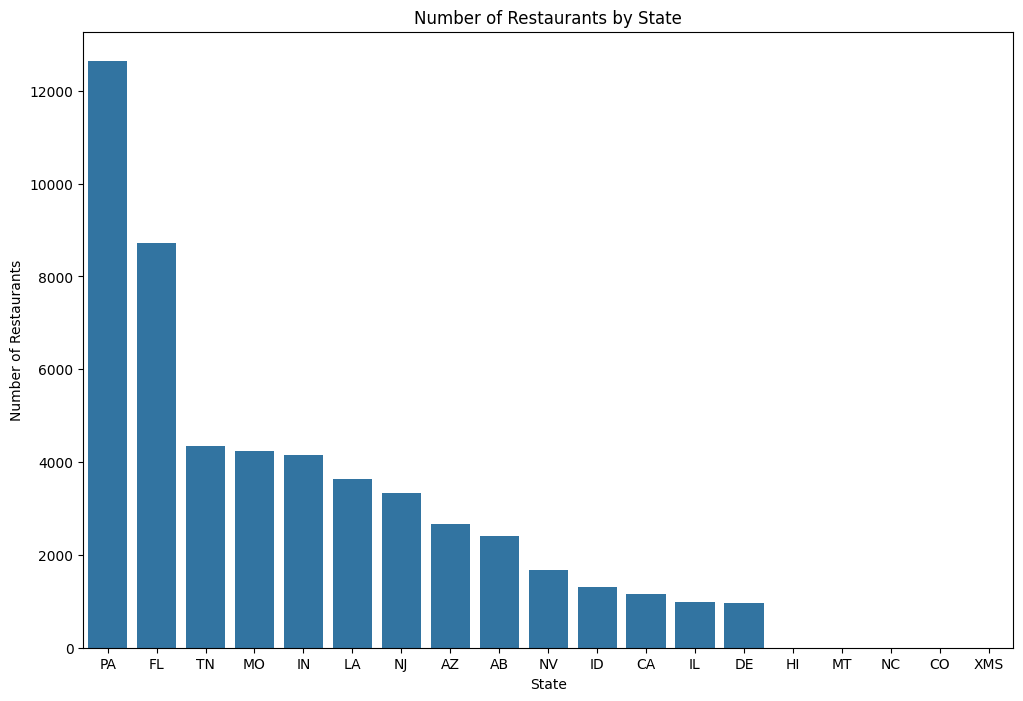

In [12]:
#plot the restuarants by state
restaurant_by_state = restaurant_df.groupby('state')['business_id']\
.count().reset_index().sort_values(by = 'business_id', ascending=False)
print(f'Included States = {restaurant_by_state.shape[0]}')

plt.figure(figsize=(12, 8))
plt.title('Number of Restaurants by State')
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
sns.barplot(
    x = restaurant_by_state['state'],
    y = restaurant_by_state['business_id']
)

<Axes: title={'center': 'Mean Stars by State'}, xlabel='State', ylabel='Stars'>

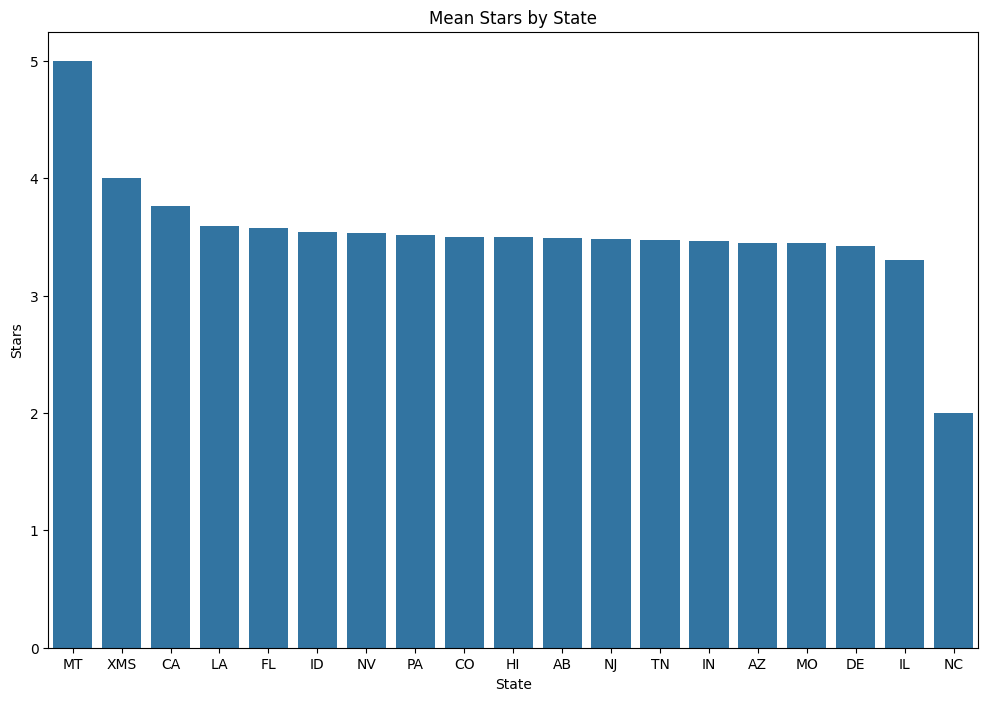

In [13]:
restaurant_by_state = restaurant_df.groupby('state')['stars'].mean()\
    .sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
plt.title('Mean Stars by State')
plt.xlabel('State')
plt.ylabel('Stars')
sns.barplot(
    x = restaurant_by_state['state'],
    y = restaurant_by_state['stars']
)

Text(0, 0.5, 'Count')

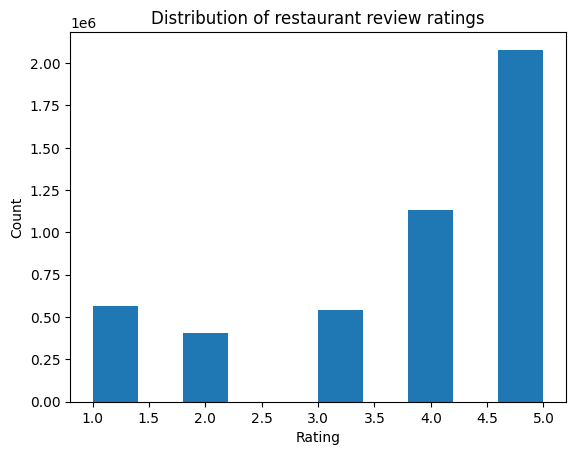

In [14]:
plt.hist(restaurant_review_df['stars'])
plt.title('Distribution of restaurant review ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

num data = 7600,null = 0
1.0 5.0
map boundary = [27.7130842, 53.6463648744, -120.0260757, -74.6907]


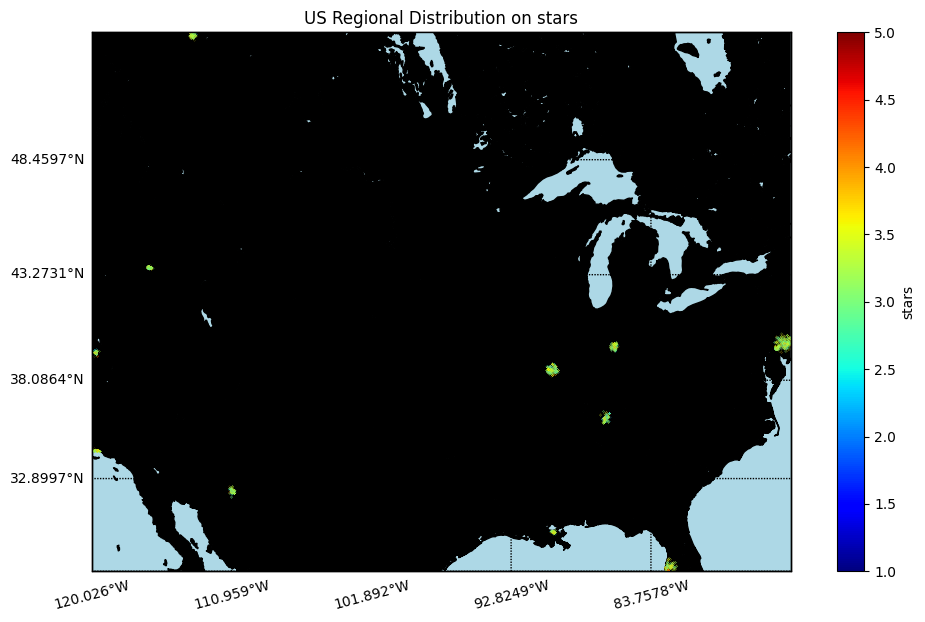

In [19]:
plot_geomap(restaurant_df, col = 'stars', task_name = 'stars', by_state = False)

num data = 8731,null = 0
1.0 5.0
map boundary = [27.5644572387, 28.4981682, -82.8503183, -82.103191]


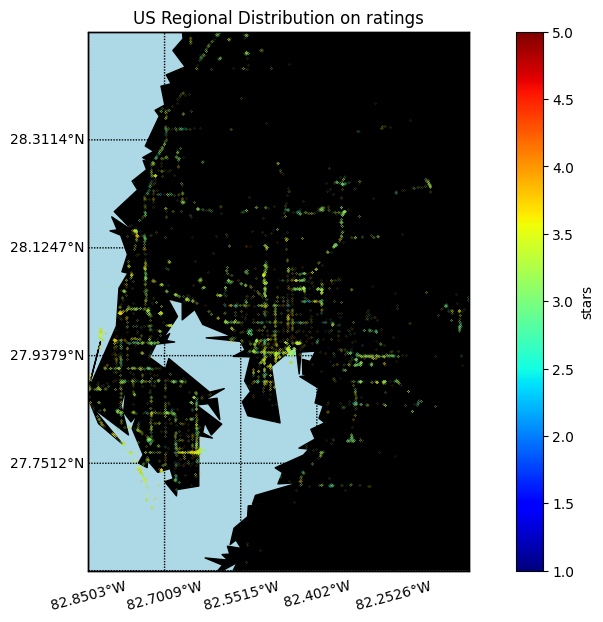

In [26]:
state_df = restaurant_df[restaurant_df['state'] == 'FL']
plot_geomap(state_df, col = 'stars', task_name = 'ratings', by_state = False)

num data = 12641,null = 0
1.0 5.0
map boundary = [39.7951245, 40.4497479, -75.7986949, -74.7721307]


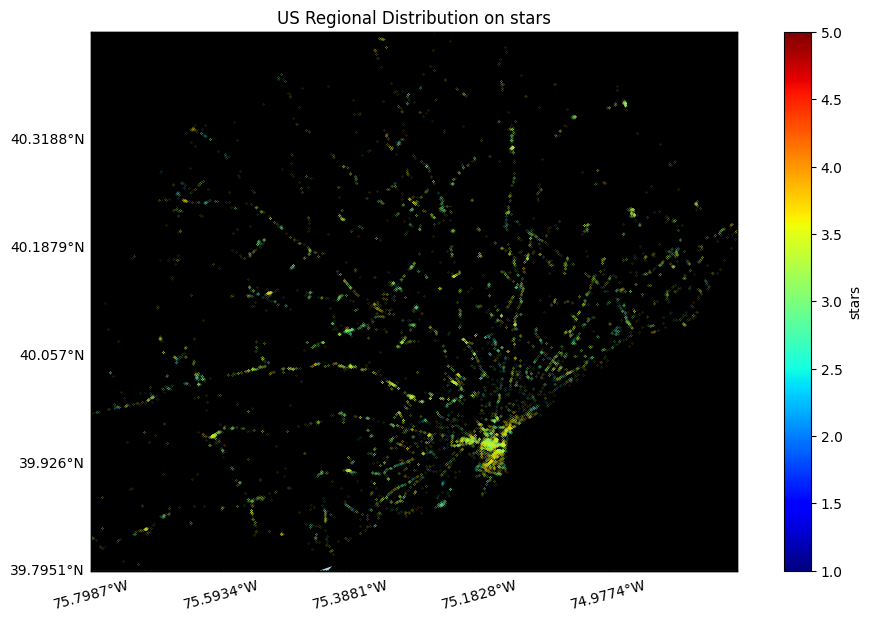

In [25]:
state_df = restaurant_df[restaurant_df['state'] == 'PA']
plot_geomap(state_df, col = 'stars', task_name = 'stars', by_state = False)

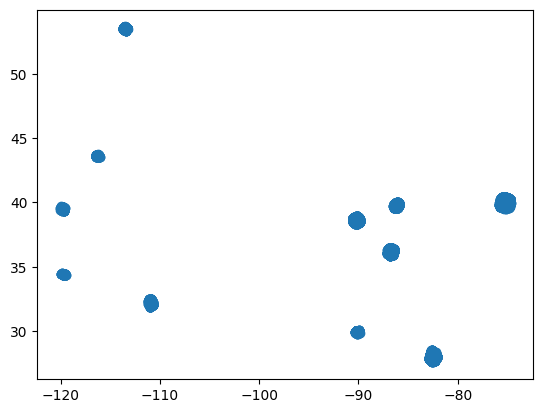

In [22]:
plt.scatter(restaurant_df['longitude'], restaurant_df['latitude'])

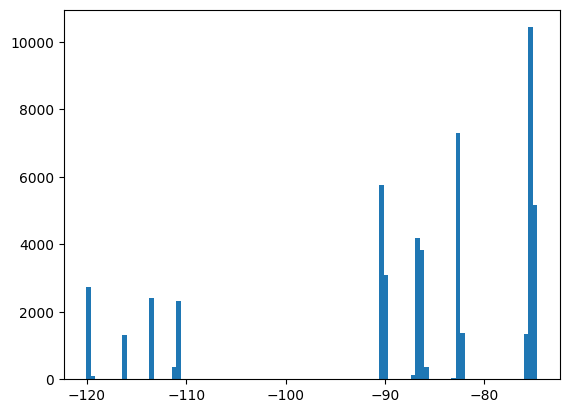

In [23]:
_ = plt.hist(restaurant_df['longitude'], bins = 100)

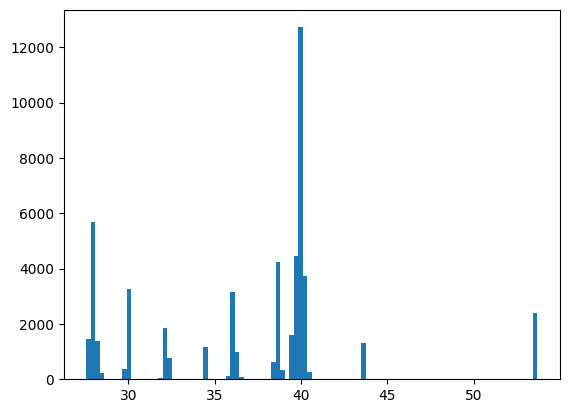

In [24]:
_ = plt.hist(restaurant_df['latitude'], bins = 100)

Above shows the distribution of number of reviews and mean ratings across states. We observe that the geographical distribution of yelp reviews are skewed towards urban areas and has very spare distributions, which makes the national level visualization less effective. We plot a few state-level visualizations to observe for potential trends. 